# 🧠 XOR Problem: Why Deep Learning Exists

A single demo connecting Linear Models → Logistic Regression → Neural Networks

## 📌 Learning Objectives
- Understand why linear models fail on XOR
- See limits of logistic regression
- Understand how neural networks solve XOR
- Introduce representation learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#**OR Problem**

##Step 1 OR Dataset

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])

## Step 2: Visualize OR

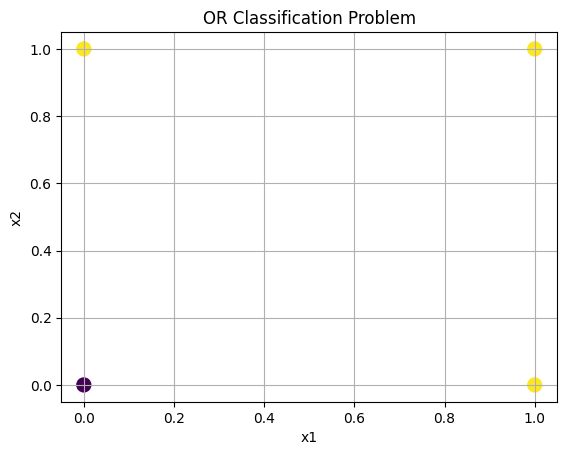

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('OR Classification Problem')
plt.grid(True)
plt.show()

## Step 3: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=5) # Increase C to reduce regularization
log_reg.fit(X, y)
print('Predictions:', log_reg.predict(X))
print('Accuracy:', log_reg.score(X, y))

Predictions: [0 1 1 1]
Accuracy: 1.0


## Step 4: Logistic Regression Decision Boundary

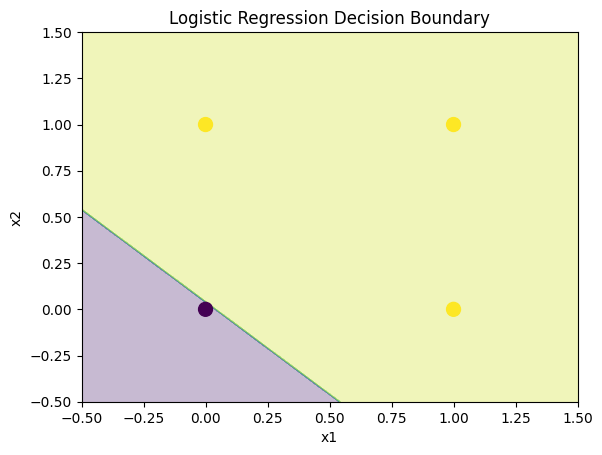

In [ ]:
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200), np.linspace(-0.5,1.5,200))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#**AND Problem**

## Step 1: AND Dataset

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

## Step 2: Visualize AND

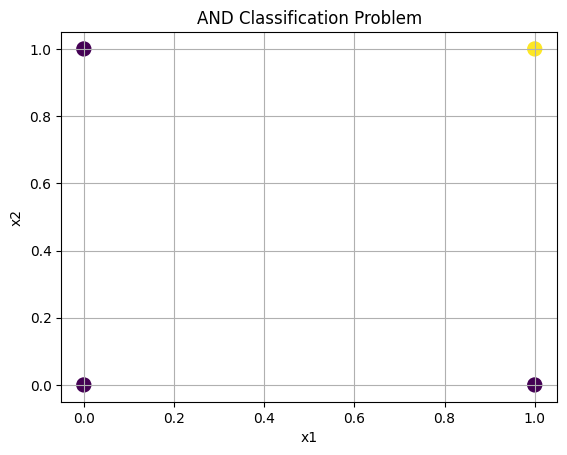

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AND Classification Problem')
plt.grid(True)
plt.show()

## Step 3: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=5)
log_reg.fit(X, y)
print('Predictions:', log_reg.predict(X))
print('Accuracy:', log_reg.score(X, y))

Predictions: [0 0 0 1]
Accuracy: 1.0


## Step 4: Logistic Regression Decision Boundary

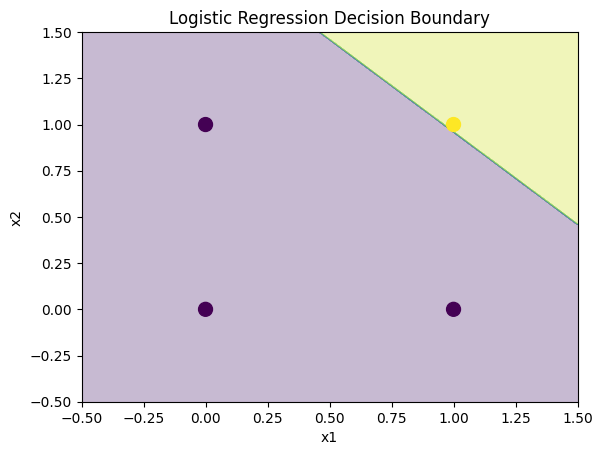

In [ ]:
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200), np.linspace(-0.5,1.5,200))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#**XOR Problem**

## 🔹 Step 1: XOR Dataset

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

## 🔹 Step 2: Visualize XOR

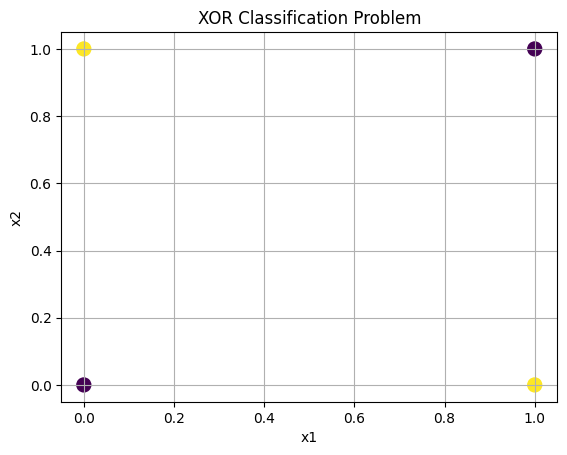

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Classification Problem')
plt.grid(True)
plt.show()

## 🔹 Step 3: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
print('Predictions:', log_reg.predict(X))
print('Accuracy:', log_reg.score(X, y))

Predictions: [0 0 0 0]
Accuracy: 0.5


## 🔹 Step 4: Logistic Regression Decision Boundary

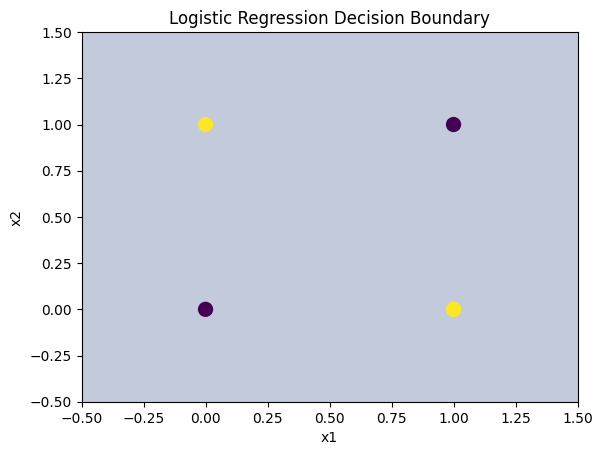

In [ ]:
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200), np.linspace(-0.5,1.5,200))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 🔹 Step 5: Neural Network with One Hidden Layer

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='tanh',
    solver='lbfgs',
    random_state = 1
)

nn.fit(X, y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(2,), random_state=1,
              solver='lbfgs')

##Visualize NN Configuration

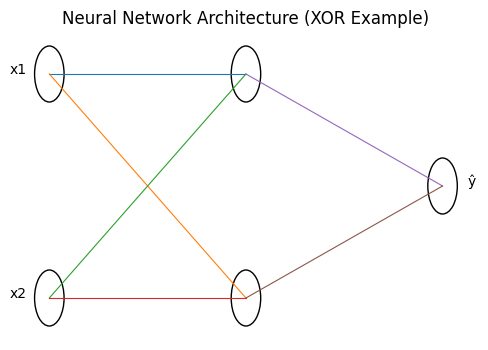

In [ ]:
import matplotlib.pyplot as plt

def draw_neural_network(layers):
    """
    layers: list of integers
            e.g. [2, 2, 1] → input, hidden, output
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.axis('off')

    x_spacing = 2
    y_spacing = 1.2

    for layer_idx, neurons in enumerate(layers):
        x = layer_idx * x_spacing
        y_start = (neurons - 1) * y_spacing / 2

        # Draw neurons
        for neuron_idx in range(neurons):
            y = y_start - neuron_idx * y_spacing
            circle = plt.Circle((x, y), radius=0.15, fill=False)
            ax.add_patch(circle)

            # Labels
            if layer_idx == 0:
                ax.text(x - 0.4, y, f"x{neuron_idx+1}", fontsize=10)
            elif layer_idx == len(layers) - 1:
                ax.text(x + 0.25, y, "ŷ", fontsize=10)

        # Draw connections
        if layer_idx > 0:
            prev_neurons = layers[layer_idx - 1]
            prev_y_start = (prev_neurons - 1) * y_spacing / 2

            for i in range(prev_neurons):
                for j in range(neurons):
                    y1 = prev_y_start - i * y_spacing
                    y2 = y_start - j * y_spacing
                    ax.plot([x - x_spacing, x], [y1, y2], lw=0.8)

    ax.set_title("Neural Network Architecture (XOR Example)")
    plt.show()


# XOR network: 2 input → 2 hidden → 1 output
draw_neural_network([2, 2, 1])


## 🔹 Step 6: Neural Network Predictions

In [ ]:
print('Predictions:', nn.predict(X))
print('Accuracy:', nn.score(X, y))

Predictions: [0 1 1 0]
Accuracy: 1.0


## 🔹 Step 7: Neural Network Decision Boundary

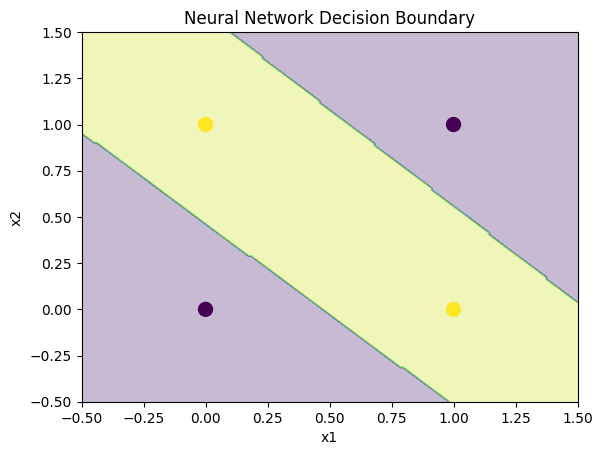

In [ ]:
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.title('Neural Network Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 🧩 Final Takeaway
**XOR is hard not because learning fails, but because representation is missing.**